C:\Users\zhuxx\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Training Score:0.973259
Testing Score:0.956498


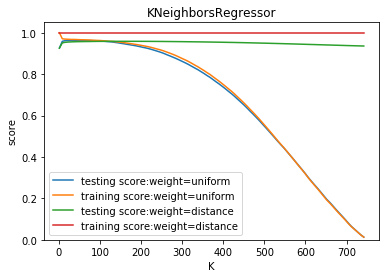

In [1]:
# -*- coding: utf-8 -*-
"""
    kNN和降维
    ~~~~~~~~~~

    KNeighborsRegressor

    :copyright: (c) 2016 by the huaxz1986.
    :license: lgpl-3.0, see LICENSE for more details.
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, cross_validation

def create_regression_data(n):
    '''
    创建回归模型使用的数据集

    :param n: 数据集大小
    :return: 一个元组，依次为：训练样本集、测试样本集、训练样本的值、测试样本的值
    '''
    X =5 * np.random.rand(n, 1)
    y = np.sin(X).ravel()
    y[::5] += 1 * (0.5 - np.random.rand(int(n/5))) # 每隔 5 个样本就在样本的值上添加噪音
    return cross_validation.train_test_split(X, y,test_size=0.25,random_state=0)# 进行简单拆分，测试集大小占 1/4

def test_KNeighborsRegressor(*data):
    '''
    测试 KNeighborsRegressor 的用法

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的值、测试样本的值
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    regr=neighbors.KNeighborsRegressor()
    regr.fit(X_train,y_train)
    print("Training Score:%f"%regr.score(X_train,y_train))
    print("Testing Score:%f"%regr.score(X_test,y_test))
def test_KNeighborsRegressor_k_w(*data):
    '''
    测试 KNeighborsRegressor 中 n_neighbors 和 weights 参数的影响

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的值、测试样本的值
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    Ks=np.linspace(1,y_train.size,num=100,endpoint=False,dtype='int')
    weights=['uniform','distance']

    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ### 绘制不同 weights 下， 预测得分随 n_neighbors 的曲线
    for weight in weights:
        training_scores=[]
        testing_scores=[]
        for K in Ks:
            regr=neighbors.KNeighborsRegressor(weights=weight,n_neighbors=K)
            regr.fit(X_train,y_train)
            testing_scores.append(regr.score(X_test,y_test))
            training_scores.append(regr.score(X_train,y_train))
        ax.plot(Ks,testing_scores,label="testing score:weight=%s"%weight)
        ax.plot(Ks,training_scores,label="training score:weight=%s"%weight)
    ax.legend(loc='best')
    ax.set_xlabel("K")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.05)
    ax.set_title("KNeighborsRegressor")
    plt.show()
def test_KNeighborsRegressor_k_p(*data):
    '''
    测试 KNeighborsRegressor 中 n_neighbors 和 p 参数的影响

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的值、测试样本的值
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    Ks=np.linspace(1,y_train.size,endpoint=False,dtype='int')
    Ps=[1,2,10]

    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ### 绘制不同 p 下， 预测得分随 n_neighbors 的曲线
    for P in Ps:
        training_scores=[]
        testing_scores=[]
        for K in Ks:
            regr=neighbors.KNeighborsRegressor(p=P,n_neighbors=K)
            regr.fit(X_train,y_train)
            testing_scores.append(regr.score(X_test,y_test))
            training_scores.append(regr.score(X_train,y_train))
        ax.plot(Ks,testing_scores,label="testing score:p=%d"%P)
        ax.plot(Ks,training_scores,label="training score:p=%d"%P)
    ax.legend(loc='best')
    ax.set_xlabel("K")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.05)
    ax.set_title("KNeighborsRegressor")
    plt.show()

if __name__=='__main__':
    X_train,X_test,y_train,y_test=create_regression_data(1000)# 获取回归模型的数据集
    test_KNeighborsRegressor(X_train,X_test,y_train,y_test)# 调用 test_KNeighborsRegressor
    test_KNeighborsRegressor_k_w(X_train,X_test,y_train,y_test)# 调用 test_KNeighborsRegressor_k_w
    #test_KNeighborsRegressor_k_p(X_train,X_test,y_train,y_test)# 调用 test_KNeighborsRegressor_k_p